# Breaking Bad Data Analysis
In this notebook, we will explore episode ratings from the critically acclaimed TV series Breaking Bad. Using descriptive statistics and data visualization, we’ll analyze trends in episode performance, and identify standout episodes. Let's dive into the numbers behind this iconic show!

## Table of Contents

1. [Loading the Data and Necessary Libraries](#Loading-data-and-necessary-libraries)
4. [Data Cleaning](#Data-Cleaning)
5. [Descriptive Statistics of Episodes Data](#Descriptive-Statistics-of-Episodes-Data)
   - [Statistics of All Episodes](#Statistics-of-All-Episodes)
   - [Grouped Statistics of Each Season](#Grouped-Statistics-of-Each-Season)
7. [Best and Worst Episodes](#Best-and-Worst-Episodes)
8. [Shortest and Longest Seasons](#Shortest-and-Longest-Seasons)
9. [Data Visualization](#Data-Visualization)
    - [Line Plot](#Line-Plot)
    - [Bar Chart](#Bar-Chart)
    - [Histogram](#Histogram)
    - [Box Plot](#Box-Plot)
    - [Scatter Plot](#Scatter-Plot)
11. [Conclusion](#Conclusion)

## Loading data and necessary libraries

In [31]:
# If you're running this notebook locally and don't have the required libraries installed, uncomment the following lines to install them:
# %pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [10]:
# Load data 
# (csv file from https://www.kaggle.com/datasets/varpit94/breaking-bad-tv-show-all-seasons-episodes-data/data)
df = pd.read_csv("../data/breaking_bad.csv",  encoding='latin-1')
df.head()

,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,20-Jan-08,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,27-Jan-08,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,10-Feb-08,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,17-Feb-08,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,24-Feb-08,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97


## Data Cleaning

In [11]:
# Look for NaN values and determine in which columns they appear
df.isnull().any()

Date                    False
Season                  False
Episode                 False
Title                   False
Directed by             False
Written by              False
Duration_mins           False
Summary                 False
Rating_IMDB             False
U.S. viewers_million     True
dtype: bool

Before we move on to the analysis, we're removing the viewership data because some values are missing, and it isn't clear how the data was collected. To ensure more reliable analysis, the focus is placed on IMDb ratings instead.

In [12]:
# Leave the columns needed for the further analysis
df = df[["Season", "Episode", "Title", "Duration_mins", "Rating_IMDB"]]
df.head()

,Season,Episode,Title,Duration_mins,Rating_IMDB
0,1,1,Pilot,58,9.1
1,1,2,Cat's in the Bag...,48,8.7
2,1,3,...And the Bag's in the River,48,8.8
3,1,4,Cancer Man,48,8.3
4,1,5,Gray Matter,48,8.4


## Descriptive Statistics of Episodes Data
In this section, we provide a detailed summary of the episode data, including statistics like IMDb ratings and episode durations across all seasons. We also break down these statistics by individual seasons, offering a clearer view of how these key metrics change from season to season. This helps us understand the general trends and differences in episode characteristics throughout the series.

### Statistics of All Episodes
The dataset reveals that the average episode duration is approximately 47.9 minutes, with episodes ranging from 43 to 60 minutes. Most episodes fall close to the 47-minute mark. In terms of ratings, the show maintains a strong performance, averaging an IMDb rating of 9.02. Ratings vary between 7.8 and a perfect 10, with half of the episodes scoring above 8.9, demonstrating the show's consistent success.

In [13]:
df.iloc[:, 3:].describe()

,Duration_mins,Rating_IMDB
count,62.000000,62.000000
mean,47.919355,9.022581
std,2.632074,0.511962
min,43.000000,7.800000
25%,47.000000,8.700000
50%,47.000000,8.900000
75%,48.000000,9.450000
max,60.000000,10.000000


### Grouped Statistics of Each Season

In [14]:
# Group data by season
grouped = df.groupby("Season")

In [15]:
# Statistics for the column "Duration_mins"
grouped[["Duration_mins"]].describe()

Duration_mins                                                   
               count       mean       std   min   25%   50%   75%   max
Season                                                                 
1                7.0  49.428571  3.779645  48.0  48.0  48.0  48.0  58.0
2               13.0  47.000000  0.408248  46.0  47.0  47.0  47.0  48.0
3               13.0  47.000000  0.000000  47.0  47.0  47.0  47.0  47.0
4               13.0  48.230769  3.767268  45.0  47.0  47.0  47.0  60.0
5               16.0  48.500000  2.828427  43.0  48.0  48.0  48.0  55.0

For episode durations, Season 1 stands out with the longest average at 49.43 minutes and the most variation. Seasons 2 and 3 are consistent at 47 minutes, while Season 4 introduces more variety, ranging from 45 to 60 minutes. Season 5 averages 48.5 minutes with episodes between 43 and 55 minutes.

In [16]:
# Statistics for the column "Rating_IMDB"
grouped[["Rating_IMDB"]].describe()

Rating_IMDB                                                 
             count      mean       std  min    25%   50%  75%   max
Season                                                             
1              7.0  8.785714  0.357904  8.3  8.550  8.80  9.0   9.3
2             13.0  8.861538  0.373136  8.3  8.600  8.90  9.2   9.3
3             13.0  8.807692  0.560449  7.8  8.500  8.70  9.3   9.7
4             13.0  9.023077  0.561477  8.1  8.700  8.90  9.5   9.9
5             16.0  9.431250  0.364635  8.9  9.175  9.55  9.7  10.0

IMDb ratings show a steady increase over the seasons. Season 1 begins at 8.79, and Season 2 maintains a similar level at 8.86. After a small drop in Season 3, ratings rise to 9.02 in Season 4, with Season 5 reaching an impressive 9.43, even hitting a perfect 10.

## Best and Worst Episodes

In [17]:
# Find title of the best episode
max_rating = float(df[["Rating_IMDB"]].max().iloc[0])
best_episode = df.loc[df["Rating_IMDB"] == max_rating][["Title"]]
best_episode

,Title
59,Ozymandias


In [18]:
# Find title of the worst episode
min_rating = float(df[["Rating_IMDB"]].min().iloc[0])
worst_episode = df.loc[df["Rating_IMDB"] == min_rating][["Title"]]
worst_episode

,Title
29,Fly


## Shortest and Longest Seasons

In [19]:
# Table with the sum of duration for ech season
time_sums = grouped[["Duration_mins"]].sum()
time_sums

,Duration_mins
Season,
1,346
2,611
3,611
4,627
5,776


In [20]:
# Find the longest season
max_time = grouped[["Duration_mins"]].sum().max().iloc[0]
longest_season = time_sums.loc[time_sums["Duration_mins"] == max_time]
longest_season

,Duration_mins
Season,
5,776


In [21]:
# Find the shortest season
min_time = grouped[["Duration_mins"]].sum().min().iloc[0]
longest_season = time_sums.loc[time_sums["Duration_mins"] == min_time]
longest_season

,Duration_mins
Season,
1,346


## Data Visualization

### Line Plot

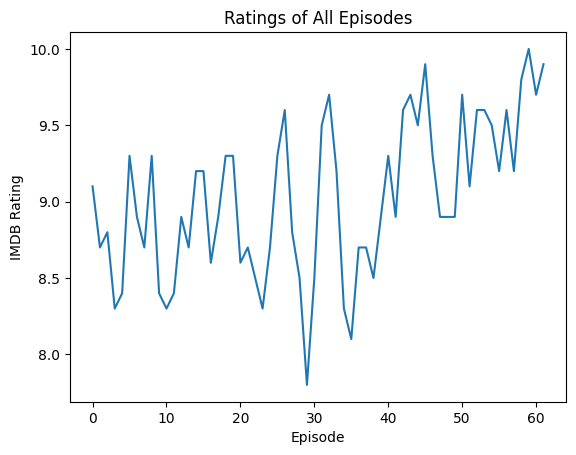

In [22]:
plt.plot(df[["Rating_IMDB"]])

# Add labels to the axes
plt.xlabel("Episode")
plt.ylabel("IMDB Rating")
plt.title("Ratings of All Episodes")

plt.show()

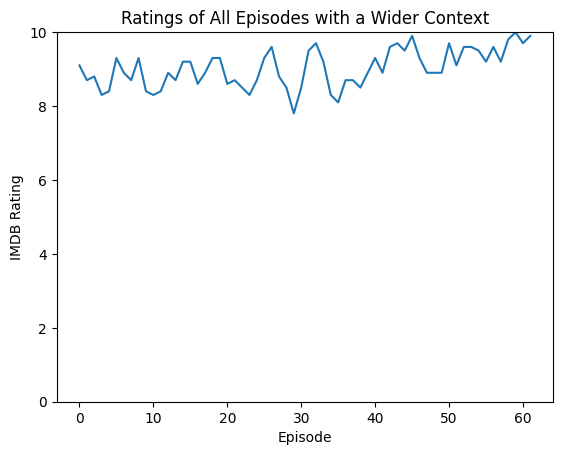

In [23]:
plt.plot(df[["Rating_IMDB"]])
plt.ylim(0, 10)

# Add labels to the axes
plt.xlabel("Episode")
plt.ylabel("IMDB Rating")
plt.title("Ratings of All Episodes with a Wider Context")

plt.show()

In the first plot, we see the IMDB ratings for all episodes in a detailed view, focusing on a smaller range from 8.0 to 10.0. This makes the ups and downs in ratings between episodes more noticeable. Some episodes clearly stand out as higher or lower in ratings, but overall, there is an upward trend as the show moves forward.

The second plot shows the same ratings but on a wider scale, with the y-axis starting from 0. Even though the ratings still range between 8.0 and 10.0, this makes the differences between episodes look smaller. It gives a sense of more consistent performance, showing that even the lowest-rated episodes were still rated fairly well.

### Bar Chart
This bar chart highlights the top five rated episodes of Breaking Bad. Leading the list is 'Ozymandias,' reflecting its standout performance based on IMDB ratings from our earlier analysis.

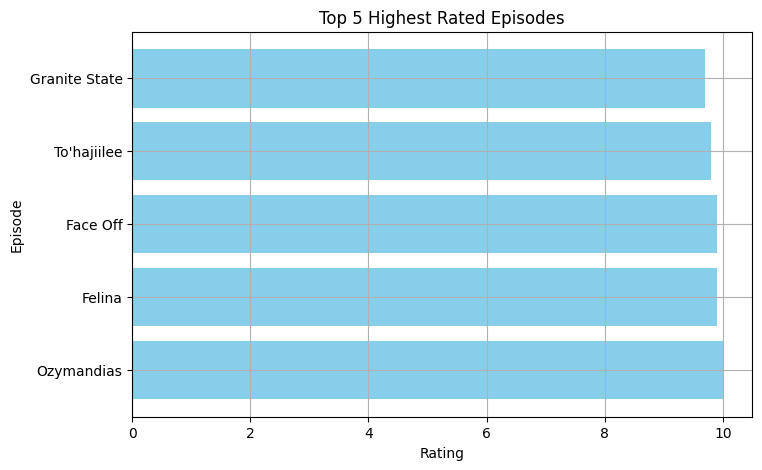

In [24]:
# Sort and take top 5
df_top_rated = df[["Title", "Rating_IMDB"]]
df_top_rated = df_top_rated.sort_values(by='Rating_IMDB', ascending=False).head(5)

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(df_top_rated["Title"], df_top_rated["Rating_IMDB"], color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Episode")
plt.title("Top 5 Highest Rated Episodes")
plt.grid(True)

plt.show()

### Histogram
This histogram represents the distribution of IMDb ratings across all Breaking Bad episodes. We can see a multimodal pattern with three prominent peaks: between 9.12–9.34 (the highest peak with 12 episodes), a smaller cluster around 9.56–9.78, and another notable rise around 8.24–8.46. The distribution is slightly skewed to the right, indicating that most episodes received high ratings, with the majority of episodes scoring between 8.9 and 9.34. The few lower-rated episodes stand out at the left end, with the lowest rating being 7.8.

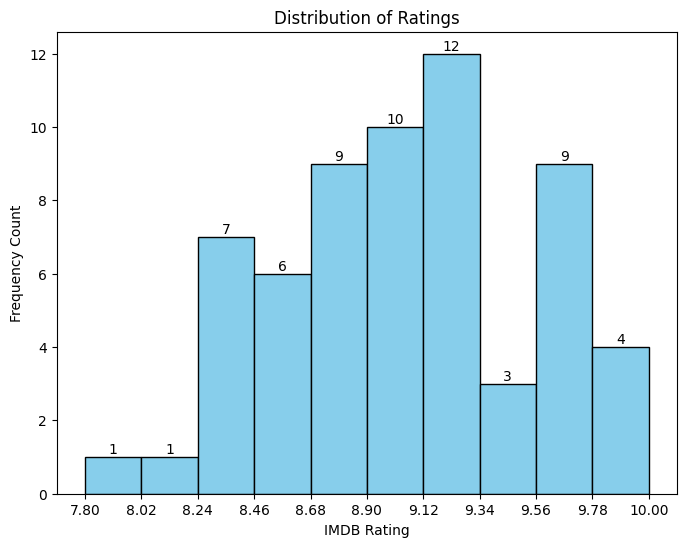

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting
counts, bins = np.histogram(df[["Rating_IMDB"]])
n, bins, patches = plt.hist(bins[:-1], bins, weights=counts, color='skyblue', edgecolor='black')

# Show counts on theh top of each bar
for i in range(len(bins) - 1):
    if n[i] > 0:
        plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] + 0.1, str(int(n[i])), fontsize=10, ha='center')

# Arrange ticks for bins 
ax.set_xticks(np.arange(bins[0], bins[-1], bins[1] - bins[0]))

# Add labels to the axes
plt.xlabel("IMDB Rating")
plt.ylabel("Frequency Count")
plt.title("Distribution of Ratings")

plt.show()

### Box Plot
The box plots highlight the distribution of IMDb ratings across the five seasons of Breaking Bad. Seasons 1, 2, and 5 show more consistent ratings, with tighter interquartile ranges (the boxes) and fewer outliers, indicating viewers’ scores were more uniform. On the other hand, Seasons 3 and 4 had the widest spread in ratings, indicating more variability in how the episodes were received. Season 3, in particular, has the largest range, stretching from 8.0 to almost 10.0, while Season 4 also has a broad range but clusters more toward the higher ratings.

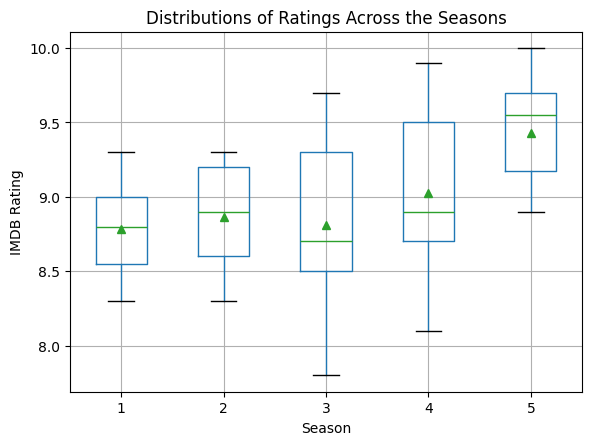

In [26]:
# Plotting
df[["Season", "Rating_IMDB"]].boxplot(by="Season", showmeans=True)

# Add labels to the axes and give the title to the plot
plt.xlabel("Season")
plt.ylabel("IMDB Rating")
plt.title("Distributions of Ratings Across the Seasons")
plt.suptitle("")

plt.show()

### Scatter Plot
Interestingly, there doesn't seem to be a strong correlation between longer episodes and higher ratings. Some of the most highly-rated episodes fall within the typical 47-48 minute range.

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

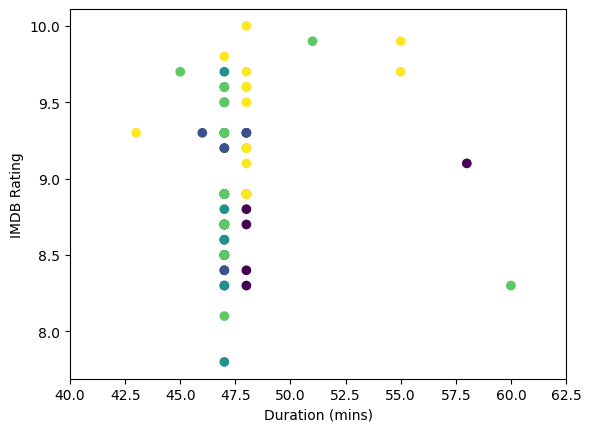

In [27]:
# Correlation between the episode length and the ratings
x = df[["Duration_mins"]]
y = df[["Rating_IMDB"]]
c = df["Season"]
plt.scatter(x, y, c=c)

# Add labels to the axes
plt.xlabel("Duration (mins)")
plt.ylabel("IMDB Rating")

# Set the limit for x axis
plt.xlim(40, 62.5)

# How many colors are needed
cmap = plt.get_cmap('viridis', np.max(c) - np.min(c) + 1)
# Min and max values for the color bar
norm = mpl.colors.Normalize(vmin=np.min(c) - 0.5, vmax=np.max(c) + 0.5)

# Colorbar to assign colors 
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label="Season")
plt.title("Correlation between Ratings and Duration of the Episodes")

plt.show()

## Conclusion
Breaking Bad consistently garnered high ratings across its episodes, with most falling between 9.0 and 9.34 on IMDb. The top-rated episodes like Ozymandias and Felina achieved near-perfect scores, underscoring their impact on viewers. While seasons 1, 2, and 5 showed steady and consistent ratings, seasons 3 and 4 exhibited greater variability, indicating that they had both exceptional and more moderately received episodes. Overall, the series maintained a high standard, with ratings generally improving as the storyline progressed.